
### <center>Procesamiento Digital de Señales de Audio</center>
#### <center>Instituto de Ingeniería Eléctrica - UdelaR</center>
# Hoja de Ejercicios 4 - Curso 2022
### Análisis homomórfico
### Análisis por predicción lineal


## Pautas para el práctico
 - La realización del presente trabajo es individual.
 - Se espera la entrega de un PDF escrito en $\LaTeX$ o similar. El mismo tendrá:
     - Máximo de 14 páginas
     - Máximo de 2500 palabras
 - También se espera la entrega del código escrito, en scripts Python o en este mismo Jupyter Notebook.
 - La corrección del práctico se hará sobre lo entregado en el PDF, pero podremos apoyarnos en el razonamiento y comprensión demostrado en el código escrito. Recomendamos escribir el código de forma prolija para facilitar la comprensión presente y futura tanto de nosotros como de ustedes mismxs.


**Nombre de el/la estudiante:** Julian O'Flaherty

### Como correr este notebook

Es posible descargarlo y correrlo localmente en su computadora

Tambien pueden correrlo en Google Colab usando el siguiente link.

<table align="center">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/mrocamora/audio-dsp/blob/main/practicos/AudioDSP_Practico_4.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Correr en Google Colab</a>
  </td>
</table>

In [475]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import io, signal
from scipy.io.wavfile import read
from IPython.display import Audio, display

# Ejercicio 1

En este ejercicio se estudia el cepstrum de señales de audio. Según el modelo del mecanismo de producción de la voz, la señal de voz se puede expresar como $s[n]=p[n]*h[n]$, donde $p[n]$ es la señal de excitación y $h[n]$ es la respuesta al impulso del tracto vocal. Mediante el cepstrum complejo se pretende deconvolucionar la señal de voz en la excitación y la respuesta al impulso.


## Parte 1


1. En el caso de sonidos sonoros, la excitación $p[n]$ es un tren de pulsos periódico,

    $$p[n]=\beta^n\sum_{k=0}^{\infty}\delta[n-kP]$$

    Calcular analíticamente el cepstrum complejo $\hat{p}[n]$ de $p[n]$. Graficar empleando los valores $\beta = 0.99$ y $P=80$.

1. Calcular analíticamente el cepstrum complejo $\hat{h}[n]$ de la secuencia $h[n]$ cuya transformada $\mathcal{Z}$ es
  $$ H(z) = \frac{(1-bz)(1-b^*z)}{(1-cz^{-1})(1-c^*z^{-1})},\;\;\;\textrm{con }|b|,|c|<1 $$

    Graficar empleando los valores $b=0.97e^{j0.88\pi}$ y $c=0.97e^{j0.12\pi}$.

1. Considere ahora la señal $s[n]=h[n]*p[n]$. Calcular analíticamente el cepstrum $\hat{s}[n]$ de $s[n]$.

1. Calcular el cepstrum complejo de las señales $p[n]$ y $h[n]$ utilizando la Transformada Discreta Fourier. Comparar con el resultado analítico y comentar los resultados.

1. Se desea recuperar la respuesta al impulso $h[n]$ a partir de la señal $s[n]$. Para hacerlo, liftrar el cepstrum complejo $\hat{s}[n]$ apropiadamente eliminando los componentes de altas quefrencys y aplicar el cepstrum inverso. Comparar gráficamente la respuesta al impulso recuperada con la respuesta al impulso verdadera.


#### 1

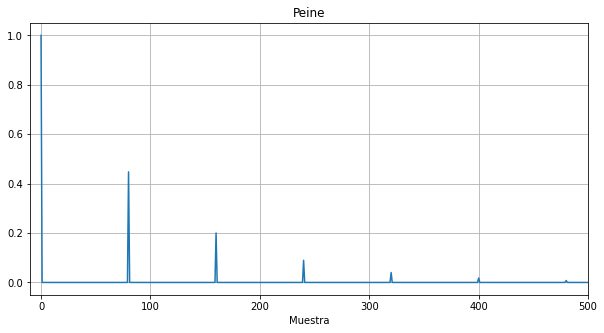

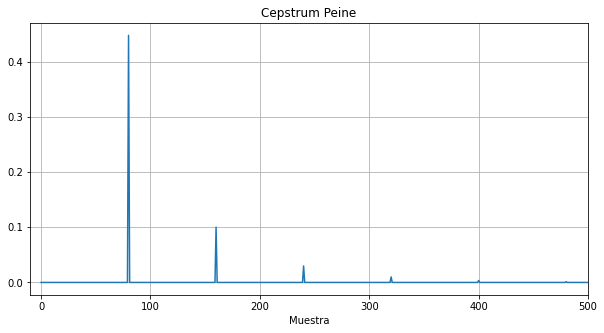

In [476]:
# Parte 1.1
N = 100000
P = 80
beta = 0.99
p = np.zeros(N)
p[0::P] = beta**np.arange(0, N, P)

plt.figure(figsize=(10,5))
plt.title("Peine")
plt.xlabel("Muestra")
plt.xlim(-10, 500)
plt.plot(p)
plt.grid()

p_hat = np.zeros(N)

p_hat[P::P] = P*(beta**np.arange(P, N, P)/np.arange(P, N, P))


plt.figure(figsize=(10,5))
plt.title("Cepstrum Peine")
plt.xlabel("Muestra")
plt.plot(p_hat)
plt.xlim(-10,500)
plt.grid()

#### 2

In [477]:
N = 10000
b = 0.97*np.exp(1j*0.88*np.pi)
b_ast = b.conjugate()
c = 0.97*np.exp(1j*0.12*np.pi)
c_ast = c.conjugate()

h_hat = np.zeros(N, dtype=np.complex64)
n_vec = np.arange(-N/2, N/2)
for i, n in enumerate(n_vec):
    if n>0:
        h_hat[i] = (c**n+c_ast**n)/n
    elif n<0:
        h_hat[i] = (b**(-n)+b_ast**(-n))/n
    elif n==0:
        h_hat[i] = 0

In [478]:
N = 10000
b = 0.97*np.exp(1j*0.88*np.pi)
b_ast = b.conjugate()
c = 0.97*np.exp(1j*0.12*np.pi)
c_ast = c.conjugate()

h_hat2 = np.zeros(N, dtype=np.complex64)
n_vec = np.arange(-N/2, N/2)
for i, n in enumerate(n_vec):
    if n==0:
        continue
    elif n>1:
        h_hat2[i] = 2/n * 0.97**n * np.cos(n*0.12*np.pi)
    elif n<1:
        h_hat2[i] = 2/n * 0.97**(-n) * np.cos(n*0.88*np.pi)
    elif n==1:
        h_hat2[i] = 2/n * (0.97**n * np.cos(n*0.12*np.pi) + 0.97**(-n) * np.cos(n*0.88*np.pi))

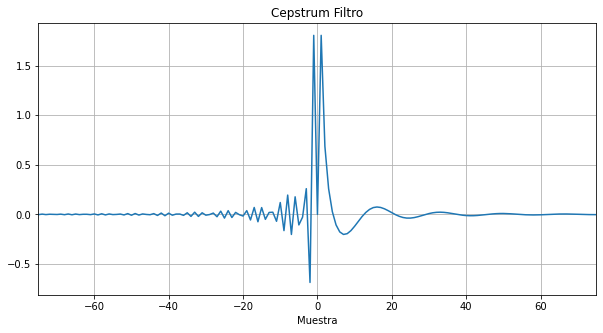

In [479]:
plt.figure(figsize=(10,5))
plt.title("Cepstrum Filtro")
plt.xlabel("Muestra")
plt.plot(n_vec, h_hat.real)
plt.xlim(-75, 75)
plt.grid()

#### 3

In [480]:
N = 10000
b = 0.97*np.exp(1j*0.88*np.pi)
b_ast = b.conjugate()
c = 0.97*np.exp(1j*0.12*np.pi)
c_ast = c.conjugate()

hp_hat = np.zeros(N, dtype=np.complex64)
n_vec = np.arange(-N/2, N/2)
for i, n in enumerate(n_vec):
    if n>0:
        hp_hat[i] = (c**n+c_ast**n)/n
    elif n<0:
        hp_hat[i] = (b**(-n)+b_ast**(-n))/n
    elif n==0:
        hp_hat[i] = 0
    if (n % P == 0) and (n>1):
        hp_hat[i] += P*beta**n/n

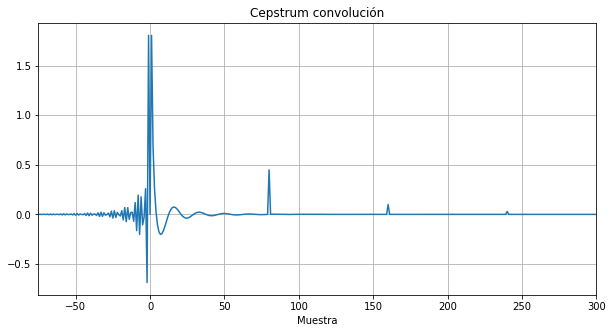

In [481]:
plt.figure(figsize=(10,5))
plt.title("Cepstrum convolución")
plt.xlabel("Muestra")
plt.plot(n_vec, hp_hat.real)
plt.xlim(-75, 300)
plt.grid()

#### 4

(0.0, 200.0)

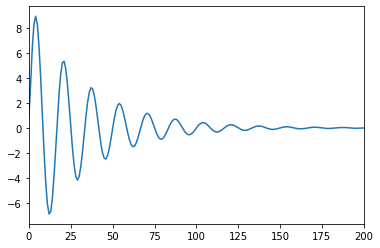

In [482]:
w, H = signal.freqz([abs(b)**2, -2*b.real, 1], [1, -2*c.real, abs(c)**2], worN=N, whole=True)
h = np.fft.ifft(H).real
plt.plot(h)
plt.xlim(0,200)

In [483]:
def cepstrum_complejo(x, nfft=None, return_r=False):
    """
    Calcula el cepstrum comlejo.
    ============================
    Params:
        -x: señal
        -nfft: numero de puntos para la DFT
        -return_r: retornar el coeficiente lineal de fase
    Returns:
        -q: vector de quefrencies
        -x_hat: cepstrum complejo
        -r: si return_r==True
    """
    
    N = nfft if nfft is not None else len(x)
    
    X = np.fft.fft(x, n=nfft)
    
    X_mag = np.abs(X)
    X_phase = np.angle(X)
    X_phase_unw = np.unwrap(X_phase)
    
    # index of the phase value at pi
    ind_pi = int(np.floor((N+1)/2))

    # compute the linear phase factor
    r = round(X_phase_unw[ind_pi]/np.pi)
    
    # compute the linear phase component
    ph_lin_component = r * np.pi * np.arange(N) / ind_pi

    # substract the linear phase component
    phaseX_unw2 = X_phase_unw - ph_lin_component
    
    logX = np.log(X_mag) + 1j*phaseX_unw2
    x_hat = np.fft.ifft(logX).real
    
    x_hat = np.fft.fftshift(x_hat)
    
    q = np.linspace(-N/2, N/2, N)
    
    if return_r:
        return q, x_hat, r
    else:
        return q, x_hat

q_p, p_hat_exp = cepstrum_complejo(p)
q_h, h_hat_exp = cepstrum_complejo(h)

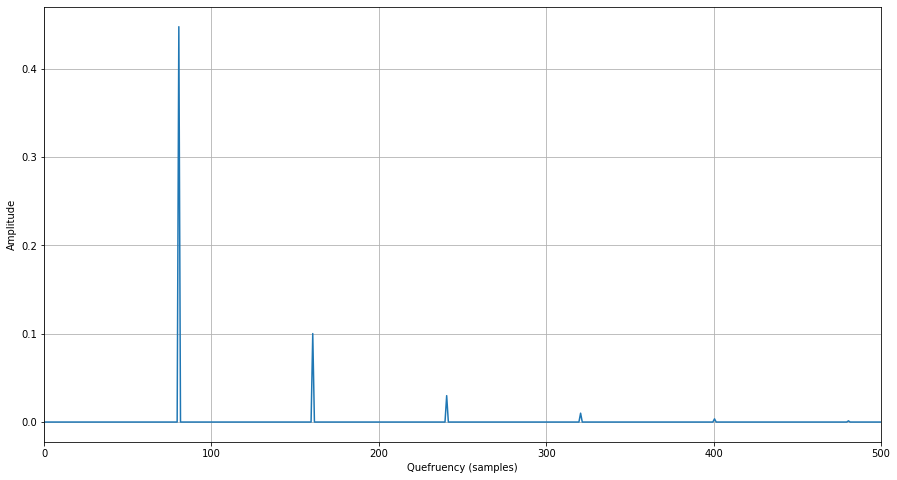

In [484]:
plt.figure(figsize=(15,8))
plt.plot(q_p, p_hat_exp, label='Experimental')
# plt.plot(p_hat, label='Teorico')
# plt.legend()
plt.grid()
plt.xlabel("Quefruency (samples)")
plt.ylabel("Amplitude")
plt.xlim(0,500)
plt.show()

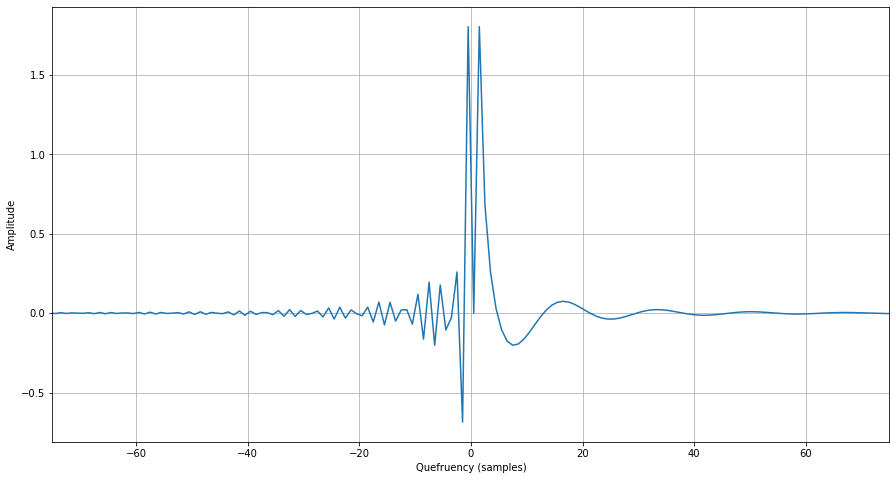

In [485]:
plt.figure(figsize=(15,8))
plt.plot(q_h, h_hat_exp)
# plt.plot(n_vec, h_hat.real)
plt.xlim(-75,75)
plt.grid()
plt.xlabel("Quefruency (samples)")
plt.ylabel("Amplitude")
plt.show()


In [486]:
s = signal.convolve(h, p)

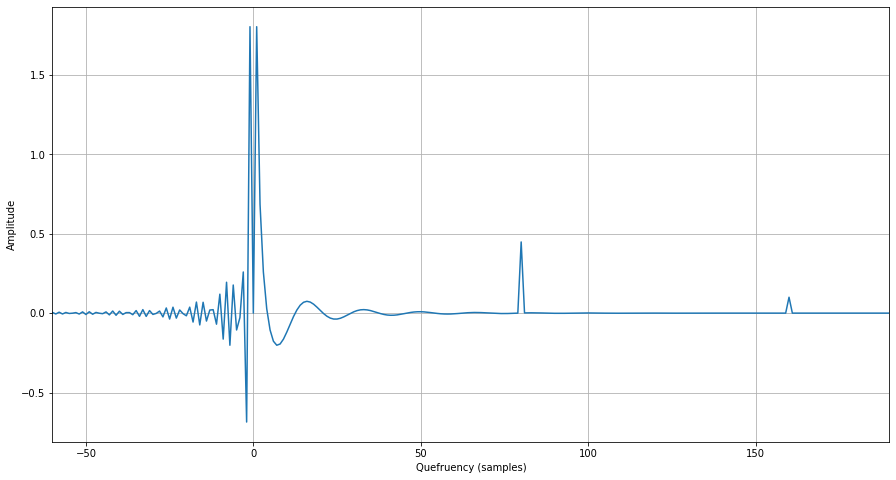

In [487]:
q_s, s_hat = cepstrum_complejo(s)
plt.figure(figsize=(15,8))
plt.plot(q_s, s_hat)
plt.grid()
plt.xlabel("Quefruency (samples)")
plt.ylabel("Amplitude")
plt.xlim(-60, 190)
plt.show()

#### 5

In [488]:
def anti_cepstrum(s, r):
    
    s_aux = np.fft.ifftshift(s)
    
    S_hat = np.fft.fft(s_aux)
    
    S = np.exp(S_hat)
    
    s = np.fft.ifft(S).real
    
    s = np.fft.fftshift(s)
    s[-r:] = s[:r]
    
    return s

(0.0, 200.0)

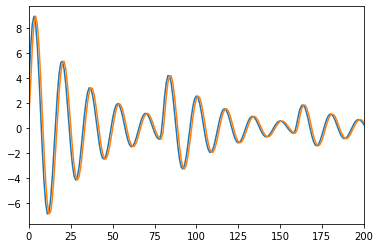

In [489]:
n, s_hat, r = cepstrum_complejo(s, return_r=True)
s_rec = anti_cepstrum(s_hat, r)

plt.plot(np.arange(-len(s_rec)//2, len(s_rec)//2), s_rec)
plt.plot(s)
plt.xlim(0, 200)

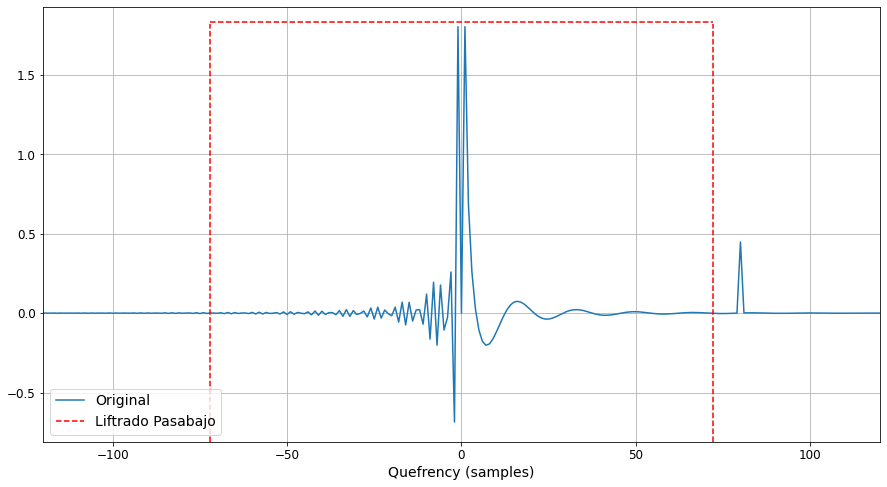

In [541]:
# se quiere liftrar el espectro
P = 80
def extraer_transferencia(s, P, qc_P=0.5, plot=False):
    
    N = len(s)
    
    n, s_hat, r = cepstrum_complejo(s, return_r=True)
    
    winn = signal.windows.get_window('hann', P)
    
    qc=int(P*qc_P)
    
    s_hat_l = s_hat.copy()
    # liftrado con ventana cuadrada
    s_hat_l[(n>qc)+(n<-qc)] = 0
    
    if plot:
        plt.figure(figsize=(15,8))
        plt.plot(n, s_hat, label='Original')
        plt.xlim(-P-0.5*P,P+0.5*P)
        plt.axvline(qc, ymax=0.96, linestyle='--', c='red', label='Liftrado Pasabajo')
        plt.axvline(-qc, ymax=0.96, linestyle='--', c='red')
        plt.axhline(y=0.95*plt.ylim()[1], xmin=0.5-qc/(2*plt.xlim()[1]), xmax=qc/(2*plt.xlim()[1])+0.5, linestyle='--', c='red')
        plt.xlabel("Quefrency (samples)", fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.grid()
        plt.legend(prop={'size': 14})
        plt.show()
      
    h_rec = anti_cepstrum(s_hat_l, r)
    
    n = np.arange(-len(h_rec)//2, len(h_rec)//2)
    
    return n, h_rec
9
n_rec, h_rec = extraer_transferencia(s, P, 0.90, True) 

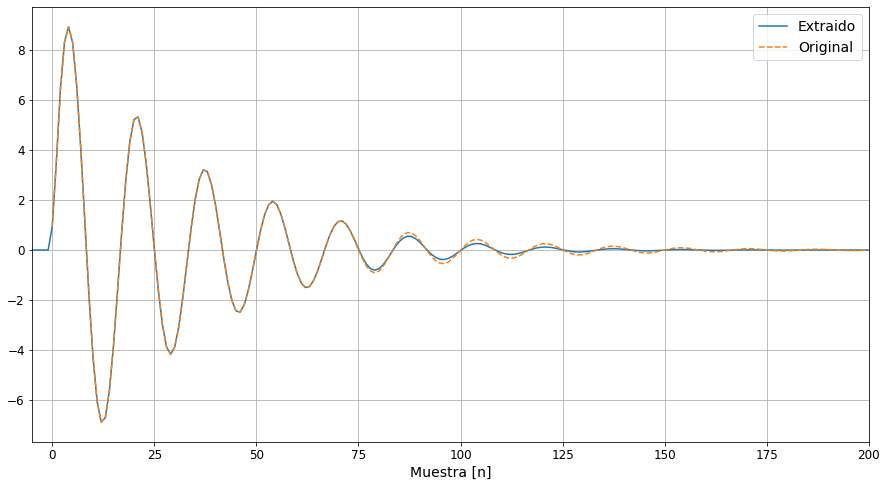

In [550]:
plt.figure(figsize=(15,8))
plt.plot(n, h_rec, label='Extraido')
plt.plot(h, '--', label='Original')
plt.xlim(-5,200)
plt.legend()
plt.grid()
plt.xlabel("Muestra [n]", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(prop={'size': 14})
plt.show()

## Parte 2
Algunas aplicaciones del cepstrum real en señales de voz son la estimación de la frecuencia fundamental y la detección de formantes. Para eso, se procesa la señal en fragmentos de tiempo corto y se calcula el cepstrum real de cada fragmento. La presencia de un pico en la región de medianas o altas quefrencys es un indicador de sonoridad y la quefrency del pico indica el período.

Se sugiere seguir los siguientes pasos para estimar la evolución de la frecuencia fundamental de la señal de voz del archivo *LP-mem-6-a.wav*

  1. Calcular el cepstrum de tiempo corto de la señal. Graficar el resultado en el plano tiempo-quefrency eliminando los componentes de bajas quefrencys para la correcta visualización del cepstrum del tren de pulsos periódico en las regiones sonoras.
  1. A partir de la presencia y posición del pico construir un algoritmo para la detección de sonoridad y frecuencia fundamental. Establecer la frecuencia fundamental en 0 Hz en las regiones en donde el sonido es sordo. Comparar el resultado con el *ground-truth*.
  



In [554]:
import pandas as pd

In [555]:
sr, audio = io.wavfile.read('LP-mem-6-a.wav')
ref = pd.read_csv("LP-mem-6-a.txt",  delimiter='  ', names=['t', 'f0'], engine='python')
Audio(audio, rate=sr)

In [556]:
def analysis_cepstral_real(x, L=2048, R=256, win='hann', qc=10):
    """ Funcion adaptada de la practica 3. Realiza el analisis cepstral de tiempo corto.
    
    Parameters
    ----------
    x : numpy array
        input audio signal (mono) as a numpy 1D array.
    L : int
        window length in samples.
    R : int
        hop size in samples.
    win : string
          window type as defined in scipy.signal.windows.    
        
    Returns
    -------
    X_stft : numpy array
             STFT of x as a numpy 2D array.
    omega_stft : numpy array
                 frequency values in radians.
    samps_stft : numpy array
                 time sample at the begining of each frame.

    """
    
    # length of the input signal
    M = x.size;      
    
    # number of points to compute the DFT (FFT)
    N = L
    
    # analysis window
    window = signal.windows.get_window(win, L)
   
    # total number of analysis frames
    num_frames = int(np.floor((M - L) / R))

    # initialize stft
    X_STCEP = np.zeros((N, num_frames))
    
    # frequency values in radians    
    quefs_stceps = np.arange(-L//2, L//2)
    
    # process each frame
    for ind in range(num_frames):

        # initial and ending points of the frame
        n_ini = int(ind * R)
        n_end = n_ini + L

        # signal frame
        xr = x[n_ini:n_end] * window

        # save DFT of the signal frame
        xr_hat = np.log(abs(np.fft.fft(xr)))
        xr_hat = np.fft.fftshift(np.fft.ifft(xr_hat))
        
        X_STCEP[:, ind] = xr_hat.real
        X_STCEP[(quefs_stceps>-qc) * (quefs_stceps<qc), ind] = 0
    
    # time sample at the center of each frame
    samps_stceps = np.arange(num_frames)*R + L/2
 
    return X_STCEP, quefs_stceps, samps_stceps

In [710]:
S_ceps, quefs_stceps, samps_stceps = analysis_cepstral_real(audio, qc=30)

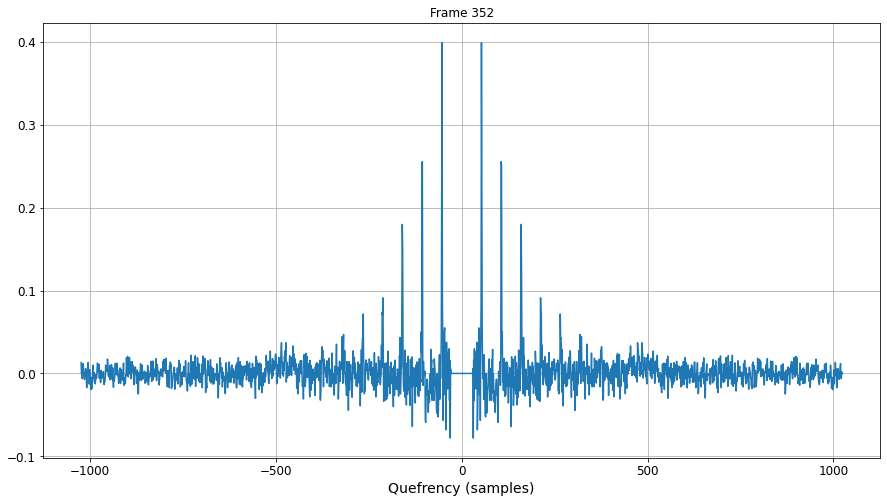

In [711]:
n_plot = np.random.randint(0, len(samps_stceps))
plt.figure(figsize=(15,8))
plt.plot(quefs_stceps, S_ceps[:,n_plot])
# plt.xlim(-1000, 1000)
plt.xlabel("Quefrency (samples)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.title(f"Frame {n_plot}")
plt.show()

In [712]:
(S_ceps[40, :]<0.2).shape

(1493,)

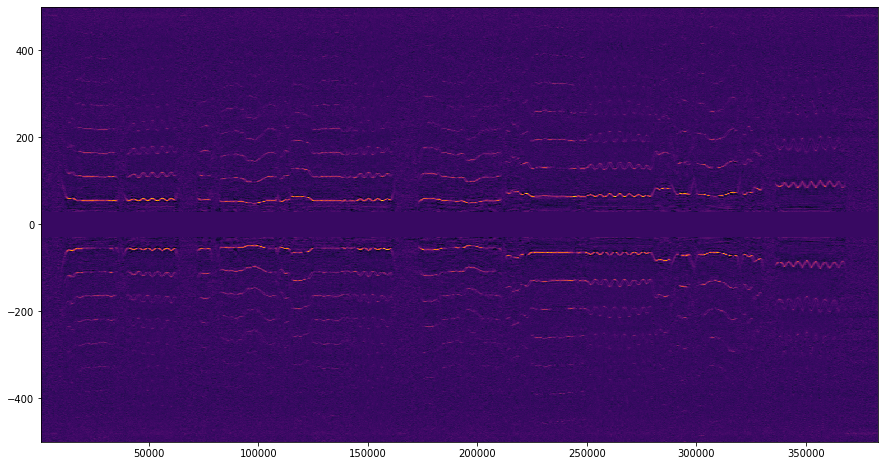

In [713]:
plt.figure(figsize=(15,8))
plt.pcolormesh(samps_stceps, quefs_stceps, S_ceps, cmap='inferno')
plt.ylim(-500, 500)
plt.show()

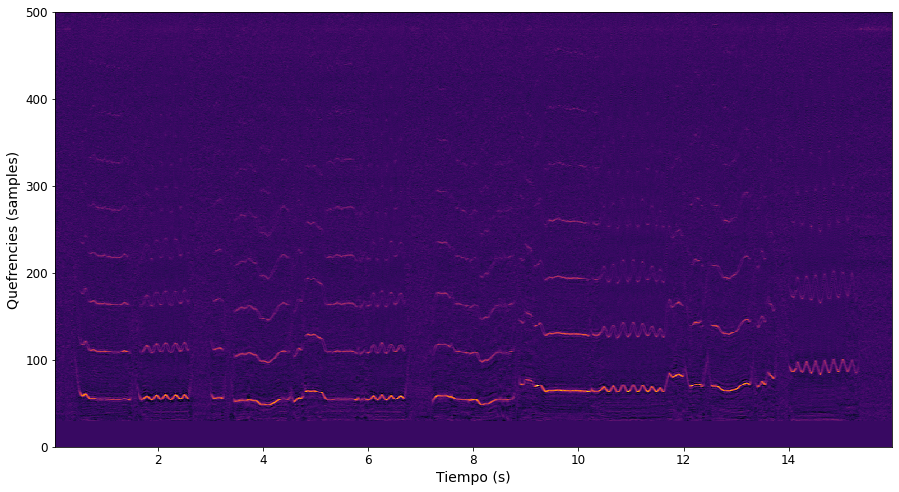

In [723]:
S_ceps, quefs_stceps, samps_stceps = analysis_cepstral_real(audio, qc=30)
plt.figure(figsize=(15,8))
plt.pcolormesh(samps_stceps/sr, quefs_stceps, S_ceps, cmap='inferno')
plt.xlabel("Tiempo (s)", fontsize=14)
plt.ylabel("Quefrencies (samples)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 500)
plt.show()

In [752]:
def estimar_f0(x, fs, L=2048, R=256, win='hann', qc=10, tol=5.5):
    
    Ts = 1/fs
    
    S_ceps, quefs_stceps, samps_stceps = analysis_cepstral_real(x, L, R, win, qc)
    
    ts = samps_stceps*Ts
    qs = quefs_stceps*Ts
    
    ind_max = np.argmax(S_ceps, axis=0)
    Tf = qs[ind_max]
    
    f0s = abs(1/Tf)
    for i in range(len(samps_stceps)):
        if S_ceps[ind_max[i],i]< np.mean(S_ceps[:,i])+tol*np.std(S_ceps[:,i]):
            f0s[i] = 0
    return ts, f0s

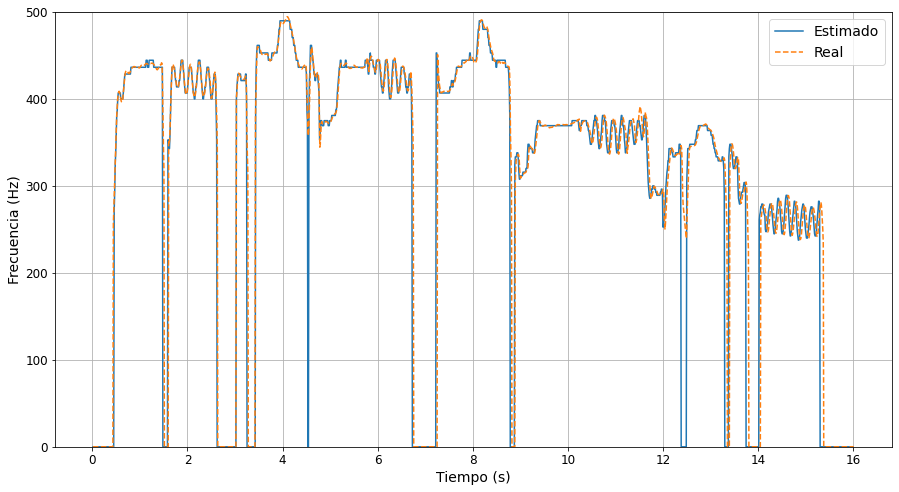

In [760]:
t, f0s = estimar_f0(audio, sr, L=512, qc=46, tol=4.5)
plt.figure(figsize=(15,8))
plt.plot(t, signal.medfilt(f0s,3), label="Estimado")
plt.plot(ref['t'], ref['f0'], '--', label='Real')
plt.xlabel("Tiempo (s)", fontsize=14)
plt.ylabel("Frecuencia (Hz)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 500)
plt.legend(prop={'size': 14})
plt.grid()
plt.show()

# Ejercicio 2

## Parte 1

En el modelo de predicción lineal se asume que la muestra actual de la señal de voz $s[n]$ es predecible a partir de una combinación lineal de $p$ muestras previas,

$$\tilde{s}[n] = \sum_{k=1}^{p}\alpha_k s[n-k]$$

El problema consiste en encontrar los coeficientes $\alpha_k$ del predictor que mejor aproximan a la señal $s[n]$. Para eso se define el error de predicción como

$$e_n[m] = s_n[m] - \tilde{s}_n[m]$$

donde $s_n[m]$ es un fragmento de tiempo corto de la señal de voz elegido en torno a la muestra $n$.

Se define el error cuadrático medio de predicción como

$$E_n = \sum_m e_n^2[m]$$

para algún intervalo de muestras $m$ que no es necesario especificar por el momento. 
En el modelo de predicción lineal, el conjunto de coeficientes $\lbrace\hat{\alpha}_k\rbrace$ óptimo es el que minimiza el error cuadrático medio de predicción. Se pide: 


1. Demostrar que los coeficientes que minimizan el error cuadrático medio obedecen el siguiente sistema lineal de ecuaciones (*ecuaciones normales*),

    $$\sum_{k=1}^{p}\hat{\alpha}_k\sum_m s_n[m-i]s_n[m-k]=\sum_m s_n[m-i]s_n[m],\,\,\,1\leq i \leq p$$

1. Demostrar que el error cuadrático medio mínimo de predicción es

    $$E_n = \sum_m s_n^2[m]-\sum_{k=1}^p\hat{\alpha}_k\sum_m s_n[m]s_n[m-k]$$



## Parte 2

En este problema se aplica la técnica de LPC para la clasificación de vocales, usando una base de datos de vocales aisladas pronunciadas por dos hablantes.

El procedimiento consiste en calcular el modelo todo polos de la señal de voz, y a partir de los polos obtener la frecuencia de las dos primeras formantes $\left(F_1,\,F_2\right)$. 


A modo de referencia, en el cuadro de abajo se indica la frecuencia promedio de las dos primeras formantes de las vocales del idioma español (Estos datos son aproximaciones de los datos provistos en http://liceu.uab.es/~joaquim/phonetics/fon_anal_acus/caract_acust.html). 


La señal analizada puede clasificarse a partir la vocal de referencia mas cercana en el plano $\left(F_1,\,F_2\right)$.

| Fonema | $$\nonumber F_1 (Hz)$$ | $$\nonumber F_2 (Hz)$$ |
|:------:|:---------:|:---------:|
|   /a/  |    800    |    1170   |
|   /e/  |    480    |    2300   |
|   /i/  |    240    |    2800   |
|   /o/  |    510    |    960    |
|   /u/  |    250    |    630    |

<center>**Primeras dos formantes de las vocales en el idioma español.**</center>


1. Implementar un algoritmo para procesar todas las señales de la base de datos, calculando para cada una la frecuencia de las dos primeras formantes. Mostrar los resultados como un mapa de formantes en el plano $\left(F_1,\,F_2\right)$.
1. Clasificar las señales a partir de las vocales de referencia. Reportar la tasa de acierto obtenida para cada vocal y para cada hablante.
1. Analizar los resultados y proponer alguna estrategia para mejorarlos. 
    

Las señales de la base de datos están muestreadas a 8000 Hz. Hay un directorio por hablante y el nombre de los archivo de audio es **[vocal]-[número].wav**, con **número** de 1 a 10. 
Los archivos contienen un único fonema, de duración variable (sin silencio al comienzo o al final), pero todos superan las 550 muestras.


Tener en cuenta los siguientes aspectos. 

- Se sugiere tomar una ventana centrada en la muestra central de cada señal. 
- Elegir adecuadamente el tamaño de la ventana $N$ y el orden $p$ del modelo.
- Calcular los polos y representarlos en un diagrama de polos y ceros. 
- Eliminar los polos reales y los polos con $\omega\geq\pi$ (Son redundantes por ser complejos conjugados de los polos con $\omega<\pi$). Eliminar los polos de ancho de banda mayor a cierto umbral. Elegir adecuadamente el umbral.
- Establecer la frecuencia de las dos primeras formantes como la frecuencia de los dos polos de menor frecuencia.


In [4]:
from scipy import linalg

In [5]:
def lpc_analysis(s, p=20):
    """ compute the LPC analysis using the autocorrelation method
    
    Parameters
    ----------
    x : numpy array
        windowed signal frame as a numpy 1D array.
    p : int
        model order.
        
    Returns
    -------
    ak : numpy array
         model coefficients.
    e : float
        minimum mean squared error.
    e_norm : float
             normalized minimum mean squared error.
    """
    # frame length
    N = s.shape[0]
    
    # compute autocorrelation values
    r = np.zeros((p+1, 1))
    for k in range(p+1):
        r[k] = np.dot(s[:N-k].T, s[k:])

    # solve to compute model coefficients
    ak = linalg.solve(linalg.toeplitz(r[:p]), r[1:p+1]).squeeze()

    # compute mean squared error
    e = r[0] - ak @ r[1:p+1]

    # compute normalized mean squared error
    e_norm = e / r[0]

    return ak, e, e_norm

In [369]:
sr = 8e3
vocales = ['a', 'e', 'i', 'o', 'u']
audios_martin = list()
audios_cecilia = list()
for voc in vocales:
    for i in range(1, 11):
        sr, a = io.wavfile.read(f'vocales/martin/{voc}-{i}.wav')
        audios_martin.append((voc, a))
    for i in range(1, 11):
        sr, a = io.wavfile.read(f'vocales/cecilia/{voc}-{i}.wav')
        audios_cecilia.append((voc, a))

In [370]:
for voc in vocales:
    print(voc)
    display(Audio(io.wavfile.read(f'vocales/martin/{voc}-{np.random.randint(1,11)}.wav')[1], rate=sr))
    display(Audio(io.wavfile.read(f'vocales/cecilia/{voc}-{np.random.randint(1,11)}.wav')[1], rate=sr))

a


e


i


o


u


In [428]:
def zero_pole_diagram(ak, fs=8e3):
    S = [1]
    U = np.concatenate([[1], -ak])

    # compute gain 
    G = np.sqrt(ret[1])
    z, p, g = signal.tf2zpk(G*S, U)
    
    plt.figure(figsize=(8,8))
    ax = plt.subplot(1, 1, 1)
    unit_circle = matplotlib.patches.Circle((0,0), radius=1, fill=False,
                             color='black', ls='solid', alpha=0.6)
    ax.add_patch(unit_circle)
    plt.axvline(0, color='0.6')
    plt.axhline(0, color='0.6')
    
    # saco polos con w>pi
    cool_poles = p[p.imag > 0]
    # saco polos reales
    cool_poles = cool_poles[cool_poles.imag!=0]
    
    # deacarto polos con ancho de banda grande
    BWs = -fs/np.pi * np.log(np.abs(cool_poles))
    
    really_cool_poles = cool_poles[BWs<BWthres]
    really_cool_poles = really_cool_poles
    frecs = np.angle(really_cool_poles)*fs/(2*np.pi)
    sorted_ind = np.argsort(frecs)
    really_cool_poles=really_cool_poles[sorted_ind][:2]

    print(np.angle(really_cool_poles)*fs/(2*np.pi))
    
    for pole in p:
        if pole in really_cool_poles:
            pm = plt.plot(pole.real, pole.imag, 'o')
            plt.setp(pm, markersize=8, markeredgewidth=1.0, 
                 markeredgecolor='red', markerfacecolor='red')
        else:
            pm = plt.plot(pole.real, pole.imag, 'go', ms=12)
            plt.setp(pm, markersize=8, markeredgewidth=1.0,
         markeredgecolor='k', markerfacecolor='k')
    plt.show()

In [460]:
L = 300
N = len(audios_martin[40][1])
win = signal.windows.get_window('hann', L)
a = np.array(audios_martin[40][1][N//2-L//2:N//2+L//2])*win
ret = lpc_analysis(a, p=10)

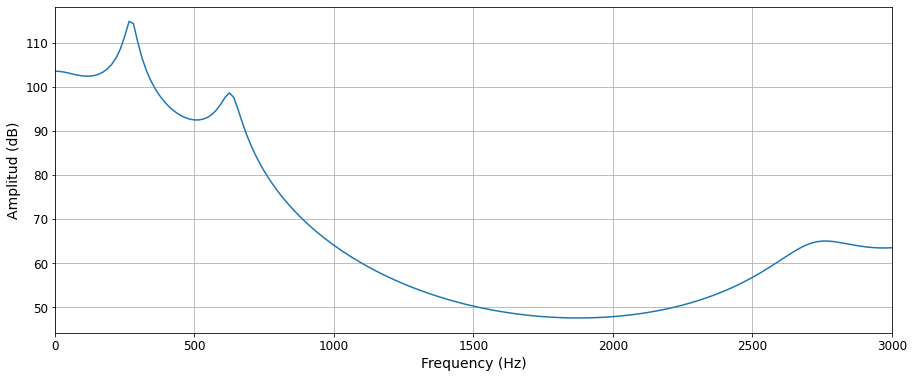

In [461]:
# filter obtained from the lpc analysis
S = [1]
U = np.concatenate([[1], -ret[0]])

# compute gain 
G = np.sqrt(ret[1])

w, H = signal.freqz(G*S, U, whole=True)
fw = (w/np.pi/2) * sr

plt.figure(figsize=(15,6))
plt.plot(fw[:len(H)//2], 20*np.log10(abs(H[:len(H)//2])))
plt.grid()
plt.xlim(0, 3000)
plt.ylabel("Amplitud (dB)", fontsize=14)
plt.xlabel("Frequency (Hz)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

[273.23703712 631.20506048]


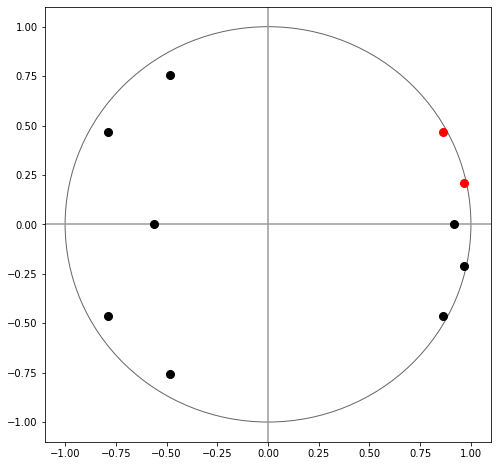

In [464]:
zero_pole_diagram(ret[0])

In [466]:
def predict_vowel(audio, fs, p=20, L=500, win_type='hann', BWthres=200, plots=False):
    
    N = len(audio)
    
    win = signal.windows.get_window(win_type, L)
    audio_filt = audio[N//2-L//2:N//2+L//2]*win
    
    aks, e, e_norm = lpc_analysis(audio_filt, p)

    B = [np.sqrt(e)]
    A = np.concatenate(([1], -aks))

    zeros, poles, G = signal.tf2zpk(B, A)
    
    if plots:
        zero_pole_diagram(aks)
        w, H = signal.freqz(B, A, whole=True)
        fw = w / (2 * np.pi) * fs

        plt.figure(figsize=(15,6))
        plt.plot(fw[:len(H)//2], 20*np.log10(abs(H[:len(H)//2])))
        plt.grid()
        plt.show()
    
    # saco polos con w>pi
    cool_poles = poles[poles.imag > 0]
    # saco polos reales
    cool_poles = cool_poles[cool_poles.imag!=0]
    
    # deacarto polos con ancho de banda grande
    BWs = -fs/np.pi * np.log(np.abs(cool_poles))
    
    really_cool_poles = cool_poles[BWs<BWthres]
    frecs = np.angle(really_cool_poles)*fs/(2*np.pi)
    
    frecs = np.sort(frecs)
    audio_formants = frecs[:2]    
    
    vowels_fem = {'a': [800, 1170], 'e': [480, 2300], 'i': [240, 2800], 'o': [510, 960], 'u': [250, 630]}
    vowels_masc = {'a': [650, 1200], 'e': [450, 2000], 'i': [260, 2300], 'o': [480, 900], 'u': [290, 650]}
    
    distances = list()
    for vow in vowels_fem:
        distances.append(np.linalg.norm(vowels_fem[vow]-audio_formants, ord=2))
    for vow in vowels_masc:
        distances.append(np.linalg.norm(vowels_masc[vow]-audio_formants, ord=2))

    pred_vow = np.argmin(distances)
    if pred_vow>4:
        pred_vow -= 5
    return pred_vow, audio_formants

In [467]:
for i in range(30, 40):
    predict_vowel(audios_martin[i][1], sr, p=9, L=300, BWthres=300)

In [470]:
err = 0
err_a = 0
err_e = 0
err_i = 0
err_o = 0
err_u = 0

preds_martin = list()

for i, audio in enumerate(audios_martin):
    preds = predict_vowel(audio[1], sr, p=9, L=300, BWthres=300)
    err += 1 * (audio[0]==vocales[preds[0]])
    err_a += 1 * (audio[0]==vocales[preds[0]]) * (audio[0]=='a')
    err_e += 1 * (audio[0]==vocales[preds[0]]) * (audio[0]=='e')
    err_i += 1 * (audio[0]==vocales[preds[0]]) * (audio[0]=='i')
    err_o += 1 * (audio[0]==vocales[preds[0]]) * (audio[0]=='o')
    err_u += 1 * (audio[0]==vocales[preds[0]]) * (audio[0]=='u')
    
    preds_martin.append((audio[0], preds[0], preds[1]))
    
print(err/(len(audios_martin)))
print(err_a/10, err_e/10, err_i/10, err_o/10, err_u/10)

0.9
0.9 1.0 1.0 0.6 1.0


In [469]:
err = 0
err_a = 0
err_e = 0
err_i = 0
err_o = 0
err_u = 0
preds_cecilia = list()
for i, audio in enumerate(audios_cecilia):
    preds = predict_vowel(audio[1], sr, p=9, L=300, BWthres=300)
    err += 1 * (audio[0]==vocales[preds[0]])
    err_a += 1 * (audio[0]==vocales[preds[0]]) * (audio[0]=='a')
    err_e += 1 * (audio[0]==vocales[preds[0]]) * (audio[0]=='e')
    err_i += 1 * (audio[0]==vocales[preds[0]]) * (audio[0]=='i')
    err_o += 1 * (audio[0]==vocales[preds[0]]) * (audio[0]=='o')
    err_u += 1 * (audio[0]==vocales[preds[0]]) * (audio[0]=='u')
    
    preds_cecilia.append((audio[0], preds[0], preds[1]))
print(err/len(audios_martin))
print(err_a/10, err_e/10, err_i/10, err_o/10, err_u/10)

0.86
0.8 0.9 0.8 0.9 0.9


In [471]:
err = 0
err_a = 0
err_e = 0
err_i = 0
err_o = 0
err_u = 0

preds_martin = list()

for i, audio in enumerate(audios_martin):
    preds = predict_vowel(audio[1], sr, p=p, L=L, BWthres=BWthres)
    err += 1 * (audio[0]==vocales[preds[0]])
    err_a += 1 * (audio[0]==vocales[preds[0]]) * (audio[0]=='a')
    err_e += 1 * (audio[0]==vocales[preds[0]]) * (audio[0]=='e')
    err_i += 1 * (audio[0]==vocales[preds[0]]) * (audio[0]=='i')
    err_o += 1 * (audio[0]==vocales[preds[0]]) * (audio[0]=='o')
    err_u += 1 * (audio[0]==vocales[preds[0]]) * (audio[0]=='u')
    
    preds_martin.append((audio[0], preds[0], preds[1]))

for i, audio in enumerate(audios_cecilia):
    preds = predict_vowel(audio[1], sr, p=9, L=300, BWthres=300)
    err += 1 * (audio[0]==vocales[preds[0]])
    err_a += 1 * (audio[0]==vocales[preds[0]]) * (audio[0]=='a')
    err_e += 1 * (audio[0]==vocales[preds[0]]) * (audio[0]=='e')
    err_i += 1 * (audio[0]==vocales[preds[0]]) * (audio[0]=='i')
    err_o += 1 * (audio[0]==vocales[preds[0]]) * (audio[0]=='o')
    err_u += 1 * (audio[0]==vocales[preds[0]]) * (audio[0]=='u')

print(err/(2*len(audios_martin)))
print(err_a/20, err_e/20, err_i/20, err_o/20, err_u/20)

0.88
0.85 0.95 0.9 0.75 0.95


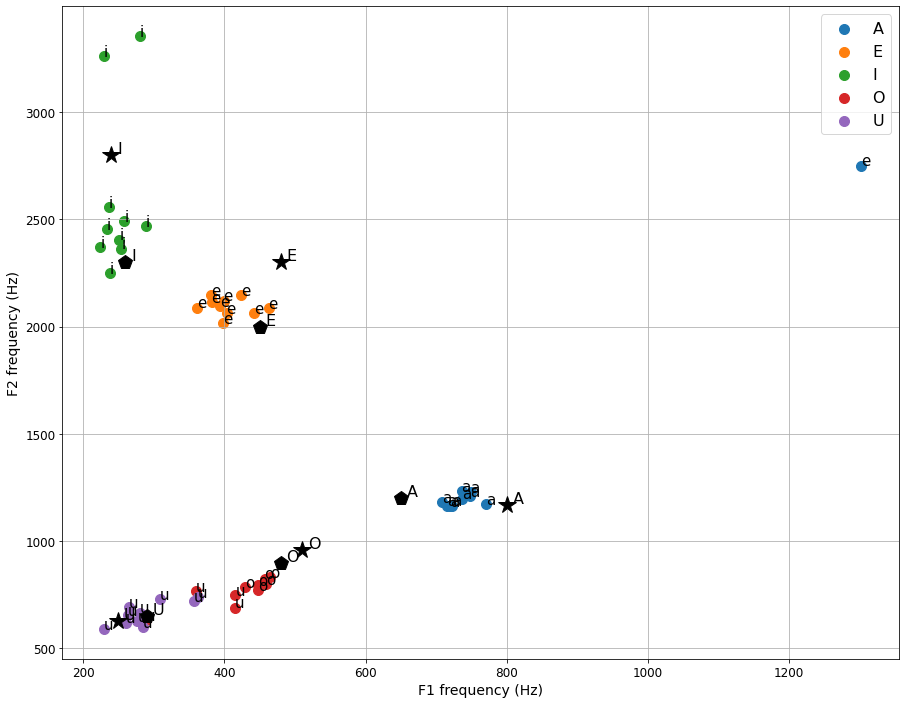

In [421]:
plt.figure(figsize=(15,12))
    
L = 300
p = 9
win_type = 'hann'
BWthres = 300
    
for vow in vocales:
    preds = list()
    formants1 = list()
    formants2 = list()
    for i in range(1,11):
        sr, a = io.wavfile.read(f'vocales/martin/{vow}-{i}.wav')
        
        pred, formants = predict_vowel(a, sr, p, L, win_type, BWthres)
        preds.append(pred)
        formants1.append(formants[0])
        formants2.append(formants[1])
    plt.scatter(formants1, formants2, s=100, marker='o', label=f'{vow.upper()}')
    for i in range(len(preds)):
        plt.annotate(vocales[preds[i]], (formants1[i], formants2[i]), fontsize=15)
    
    
vowels_fem = [[800, 1170], [480, 2300], [240, 2800], [510, 960], [250, 630]]
vowels_masc = [[650, 1200], [450, 2000], [260, 2300], [480, 900], [290, 650]]
for i in range(len(vowels_fem)):
    plt.plot(*vowels_masc[i], 'pk', markersize=14)
    plt.annotate(f'{vocales[i].upper()}', vowels_masc[i], fontsize=16, xytext=(vowels_masc[i][0]+8, vowels_masc[i][1]+8))
    plt.plot(*vowels_fem[i], '*k', markersize=18)
    plt.annotate(f'{vocales[i].upper()}', vowels_fem[i], fontsize=16, xytext=(vowels_fem[i][0]+8, vowels_fem[i][1]+8))

plt.legend(prop={'size':16})
plt.grid()
plt.xlabel("F1 frequency (Hz)", fontsize=14)
plt.ylabel("F2 frequency (Hz)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

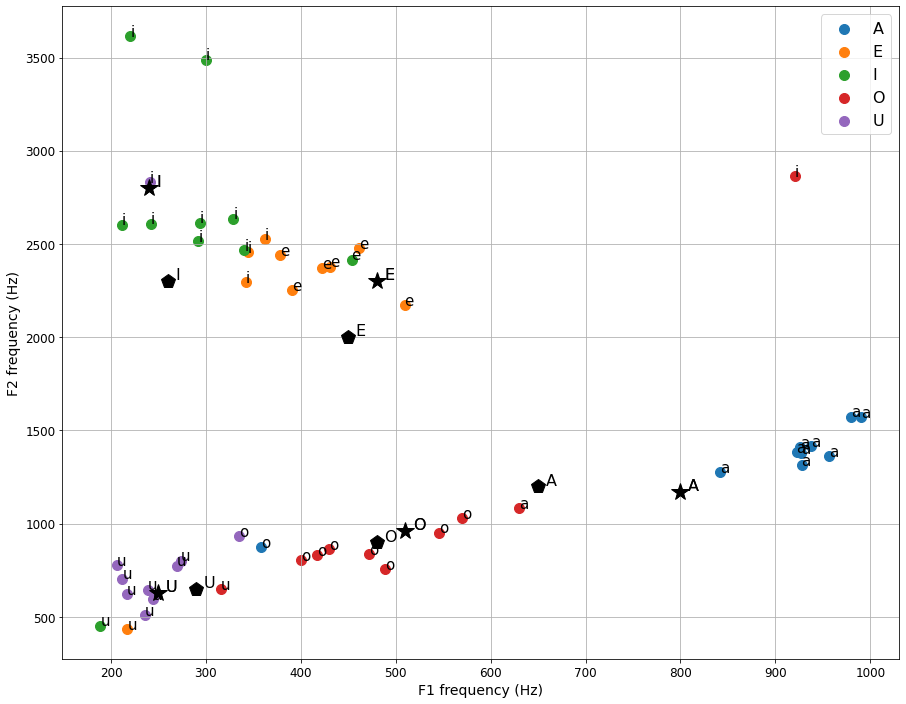

In [472]:
plt.figure(figsize=(15,12))
    
vowels_fem = [[800, 1170], [480, 2300], [240, 2800], [510, 960], [250, 630]]
for i in range(len(vowels_fem)):
    plt.plot(*vowels_fem[i], '*k', markersize=14)
    plt.annotate(f'{vocales[i].upper()}', vowels_fem[i], fontsize=16, xytext=(vowels_fem[i][0]+8, vowels_fem[i][1]+8))
    
L = 300
p = 10
win_type = 'hann'
BWthres = 300
    
for vow in vocales:
    preds = list()
    formants1 = list()
    formants2 = list()
    for i in range(1,11):
        sr, a = io.wavfile.read(f'vocales/cecilia/{vow}-{i}.wav')
        
        pred, formants = predict_vowel(a, sr, p, L, win_type, BWthres)
        preds.append(pred)
        formants1.append(formants[0])
        formants2.append(formants[1])
    plt.scatter(formants1, formants2, s=100, marker='o', label=f'{vow.upper()}')
    for i in range(len(preds)):
        plt.annotate(vocales[preds[i]], (formants1[i], formants2[i]), fontsize=15)

for i in range(len(vowels_fem)):
    plt.plot(*vowels_masc[i], 'pk', markersize=14)
    plt.annotate(f'{vocales[i].upper()}', vowels_masc[i], fontsize=16, xytext=(vowels_masc[i][0]+8, vowels_masc[i][1]+8))
    plt.plot(*vowels_fem[i], '*k', markersize=18)
    plt.annotate(f'{vocales[i].upper()}', vowels_fem[i], fontsize=16, xytext=(vowels_fem[i][0]+8, vowels_fem[i][1]+8))


plt.legend(prop={'size':16})
plt.grid()
plt.xlabel("F1 frequency (Hz)", fontsize=14)
plt.ylabel("F2 frequency (Hz)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()